<img src="Logo_P9.PNG" height="400" width="400" >
<h1 style="color:blue; text-align:center; background-color:AliceBlue; font-size:300%; font-family:verdana; border:2px solid DodgerBlue"><br>ANALYSE POUR LE LANCEMENT A L'INTERNATIONAL<br>
<h5 style="color:black; text-align:right">NGUYEN Huynh Thanh Qui<br>Décembre 2021<br></h5>
</h1>

In [1]:
#Importation de bibliothèques
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing, metrics, cluster
from sklearn.cluster import KMeans
import scipy.cluster
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import cdist 
import seaborn as sns
import colorama
from colorama import Fore, Back, Style
from sklearn.preprocessing import MinMaxScaler
#! pip install plotly
# anaconda
#! conda install -c anaconda plot
import plotly.express as px
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")


In [27]:
print(Fore.YELLOW + Style.BRIGHT + f"Cliquer sur ce boton pour faire apparaître/disparaître le code" + Style.RESET_ALL)

Cliquer sur ce boton pour faire apparaître/disparaître le code


In [30]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:Georgia; border:2px solid LightSteelBlue"><br>PARTIE 1<br><br>Préparation de données<br></h1>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>I. Importation et lecture de données<br></h2>

In [4]:
# Lecture de données
DispoAli_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
Popu_2000_2018 = pd.read_csv('Population_2000_2018.csv')

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>Fichier 'Disponibilité Alimentaire 2017'<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Observation de données</u></h4>

<p><ul style="font-family:Time">
      <li>Ce fichier possède des informations de la disponibilité alimentaire de la population totale de chaque pays en 2017</li>
      <li>Chaque ligne correspond à un produit alimentaire et ils sont classés dans les différents éléments</li>
      <li>Dans l'optique de l'extraction de données, je vais garder que les colonnes qui contiennent des informations nécessaires pour nos analyses, donc celles du pays, du produit, de l'élément et de la quantité ('Zone', 'Produit', 'Code Élément', 'Élément', 'Valeur')</li>
</p>

In [5]:
display(DispoAli_2017.head())
DispoAli_2017.info()
DispoAli_2017.Élément.unique()
display(DispoAli_2017.shape)
print(Fore.BLUE + Style.BRIGHT + f"Le fichier 'Disponibilité Alimentaire 2017' contient {len(DispoAli_2017)} lignes" + Style.RESET_ALL)

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

(176600, 14)

Le fichier 'Disponibilité Alimentaire 2017' contient 176600 lignes


<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Extraction de données</u></h4>

In [6]:
# Observation de l'unité de chaque élément
#DispoAli_2017[['Code Élément', 'Élément', 'Unité']].value_counts().to_frame().rename(columns = {0:'Count_'}).reset_index()

In [7]:
# Unités des éléments de la disponibilté alimentaire
print(Fore.BLUE + Style.BRIGHT + f"Unité des 5 premiers éléments de la disponiblité alimentaire mondiale 2017" + Style.RESET_ALL)
Unite = DispoAli_2017[['Code Élément', 'Élément', 'Unité']].groupby(by=['Code Élément', 'Élément', 'Unité']).count()
Unite.reset_index(inplace = True)
display(Unite.head())

# Extraction de données
print(Fore.BLUE + Style.BRIGHT + f"Disponiblité alimentaire mondiale 2017" + Style.RESET_ALL)
Extract_DispoAli = DispoAli_2017.loc[:,['Zone','Code Élément','Élément', 'Produit', 'Valeur']]
Extract_DispoAli.rename(columns = {'Valeur': "Quantité"}, inplace = True)
display(Extract_DispoAli.head())

Unité des 5 premiers éléments de la disponiblité alimentaire mondiale 2017


Code Élément                                            Élément  \
0           645  Disponibilité alimentaire en quantité (kg/pers...   
1           664     Disponibilité alimentaire (Kcal/personne/jour)   
2           674  Disponibilité de protéines en quantité (g/pers...   
3           684  Disponibilité de matière grasse en quantité (g...   
4          5072                                 Variation de stock   

                Unité  
0                  kg  
1  Kcal/personne/jour  
2     g/personne/jour  
3     g/personne/jour  
4  Milliers de tonnes

Disponiblité alimentaire mondiale 2017


Zone  Code Élément                   Élément          Produit  \
0  Afghanistan          5511                Production  Blé et produits   
1  Afghanistan          5611   Importations - Quantité  Blé et produits   
2  Afghanistan          5072        Variation de stock  Blé et produits   
3  Afghanistan          5911   Exportations - Quantité  Blé et produits   
4  Afghanistan          5301  Disponibilité intérieure  Blé et produits   

   Quantité  
0    4281.0  
1    2302.0  
2    -119.0  
3       0.0  
4    6701.0

In [8]:
# Top 5 produits qui sont plus/moins apparus

print(Fore.BLUE + Style.BRIGHT + f"Top 5 produits MOINS apparus :  " + Style.RESET_ALL)
display(Extract_DispoAli.groupby(by  = "Produit").count()[['Zone']].rename(columns = {'Zone': "Count_"}).sort_values(by = 'Count_').head())

print(Fore.BLUE + Style.BRIGHT + f"Top 5 produits PLUS apparus :  " + Style.RESET_ALL)
Extract_DispoAli.groupby(by  = "Produit").count()[['Zone']].rename(columns = {'Zone': "Count_"}).sort_values(by = 'Count_').tail()

Top 5 produits MOINS apparus :  


Count_
Produit                       
Viande de Anim Aquatiq      27
Sucre non centrifugé       322
Huile de Son de Riz        424
Palmistes                  694
Sucre, betterave           728

Top 5 produits PLUS apparus :  


Count_
Produit                            
Lait - Excl Beurre             2395
Riz et produits                2452
Pommes de Terre et produits    2486
Blé et produits                2581
Maïs et produits               2593

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>Fichier 'Population 2000_2018'<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Observation de données</u></h4>

<p>
  <ul style="font-family:Time">
      <li>Ce fichier possède des informations de la population totale de chaque pays, de 2000 à 2018</li>
      <li>Chaque ligne correspond à la population totale (par 1000 personnes) par année d'un pays</li>
      <li>A noté que nos analyses utilisent des informations de la disponibilité alimentaire en 2017, c'est pour cette raison, je vais choisir que les colonnes qui contiennent des informations de la populaiton en 2017</li>
</p>

In [9]:
Popu_2000_2018.info()
display(Popu_2000_2018.shape)
print(Fore.BLUE + Style.BRIGHT + f"Ce fichier {len(Popu_2000_2018)} lignes complètes (non-null), la colonne 'Note'"+ Style.RESET_ALL )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

(4411, 15)

Ce fichier 4411 lignes complètes (non-null), la colonne 'Note'


<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Extraction de données</u></h4>

In [10]:
# Extraction des colonnes nécessaires (données de population en 2017)
Extract = Popu_2000_2018.loc[:,['Zone','Année','Valeur']]
Extract_Population_2017 = Extract[Extract['Année'] == 2017]

# Vérification de l'unité de la population
display(Popu_2000_2018['Unité'].unique())

Extract_Population_2017.rename(columns = {"Valeur" : "Population"}, inplace = True)
Extract_Population_2017.drop(columns = "Année", inplace = True)
display(Extract_Population_2017.shape)
Extract_Population_2017.head()

array(['1000 personnes'], dtype=object)

(236, 2)

Zone  Population
17     Afghanistan   36296.113
36  Afrique du Sud   57009.756
55         Albanie    2884.169
74         Algérie   41389.189
93       Allemagne   82658.409

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>II. Etude de données<br></h2>

 <ul style="font-family:Time">
      <li>Les analyses réalisées suivantes sont basées sur les données des marchés mondiaux de la viande en 2017, dans le but d'une étude de marché de l'importation/exportation des produits de volailles</li>
      <li>Plus précisément, seule les informations des produits d'origine animale tels que : viande de volailles, viande porcine, viande ovine sont utilisées dans cet étude</li>
      <li>Les champs à analyser sont la production, l'importation et l'exportaion des produits de la viande listés en dessus</li>
    <ul>

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>1. Séparation des données de "Bilans Alimentaires" par type d'éléments <br></h3>
  <ul style="font-family:Time">
      <li>Les données de "Bilans Alimentaires" se divisent par 2 types : la disponibilité alimentaire (en terme énergétique) et la disponibilité intérieure</li>
      <li>La séparation de ces 2 types de données nous permet de faciliter l'analyse d'énergie apportée par les aliments et les besoins de l'exportation/importation de chaque produit pour chaque pays. Dans l'optique de l'étude du marché d'exportation, je concentrerai sur la partie de la disponibilité intérieure. C'est pour cette raison, j'exclure des données de la disponibilité alimentaire énergétique</li>
      <li>En effet, j'utilise que les colonnes contenant les quantités d'importation, d'exportation, de production pour faire les analyses (une partie de la ligne bleue)</li>
      <img src="P9_Dispo_int.PNG" height="600" width="600" >
    <ul>
</p>

In [11]:
# Sélection des données à analyser (importation, exportation, production)
print(Fore.BLUE + Style.BRIGHT + f"Données d'importation, d'exportation et de production (de tous les produits)"+ Style.RESET_ALL )
Donnée_utilisées = [5611, 5911, 5511]
Element_Dispo_Int = Extract_DispoAli[Extract_DispoAli['Code Élément'].isin(Donnée_utilisées)]
display(Element_Dispo_Int.head())
display(Element_Dispo_Int.shape)

# Sélection des produits de la viande
liste_viandes = {'Viande de Bovins','Viande de Suides','Viande de Volailles'
                 ,'Viande, Autre','Abats Comestible', "Viande d'Ovins/Caprins"}
Produits_Viandes = Element_Dispo_Int[Element_Dispo_Int["Produit"].isin(liste_viandes)]
print(Fore.BLUE + Style.BRIGHT + f"Données de l'importation, de l'exportation et de la production de produits de la viande de {len(Produits_Viandes.Zone.unique())} pays"+ Style.RESET_ALL )
display(Produits_Viandes.head())
display(Produits_Viandes.shape)

Données d'importation, d'exportation et de production (de tous les produits)


Zone  Code Élément                  Élément          Produit  \
0   Afghanistan          5511               Production  Blé et produits   
1   Afghanistan          5611  Importations - Quantité  Blé et produits   
3   Afghanistan          5911  Exportations - Quantité  Blé et produits   
14  Afghanistan          5511               Production  Riz et produits   
15  Afghanistan          5611  Importations - Quantité  Riz et produits   

    Quantité  
0     4281.0  
1     2302.0  
3        0.0  
14     338.0  
15     415.0

(37707, 5)

Données de l'importation, de l'exportation et de la production de produits de la viande de 170 pays


Zone  Code Élément                  Élément  \
622  Afghanistan          5511               Production   
623  Afghanistan          5611  Importations - Quantité   
633  Afghanistan          5511               Production   
634  Afghanistan          5611  Importations - Quantité   
642  Afghanistan          5611  Importations - Quantité   

                    Produit  Quantité  
622        Viande de Bovins      94.0  
623        Viande de Bovins       6.0  
633  Viande d'Ovins/Caprins     160.0  
634  Viande d'Ovins/Caprins       0.0  
642        Viande de Suides       0.0

(2686, 5)

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>2. Taux de dépendance des importations (TDI)<br></h3>

  <ul style="font-family:Time">
      <li>Selon FAO, le taux de dépendance des importations (TDI) est un indice qui permet d'analyser <b>la situation d'alimentaire d'un pays</b>, <i>"il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même"</i> </li>
          (Source : https://www.fao.org/3/x9892f/x9892f09.htm#TopOfPage)
      <li>Il se définit par : </li>
      <img src="P9_TDI.PNG" height="400" width="400" >
      <li>En effet, plus la valeur de TDI est grande, plus l'importation de ce produit est importante ou il existe une haute concurrence sur le marché </li>
      <li><b>Le complément de ce pourcentage</b> représente <b>la part de l'approvisionnement national</b> produite dans le pays. Cependant, <b>ces pourcentages n'ont de sens que si les importations servent principalement à la consommation intérieure et ne sont pas réexportées</b></li>
      <li>C'est pour cette raison, j'utilise cet indice comme une variable clé pour analyser le besoin d'importation des produits animales des pays, plus il est élevé, plus le produit est importé, dans la limite de 100%. Les produits ayant une valeur de TDI <b>supérieure à 100%<b> sont considérés pour le but de <b>réexportation<b></li>

In [31]:
# Préparation de donnée
Viandes = Produits_Viandes.loc[:,['Produit','Zone','Élément','Quantité']] #sélectionner les colonnes
Viandes = Viandes.pivot_table(Viandes, index=['Zone','Produit'], columns=['Élément'], aggfunc=np.sum) #pivoter df
Viandes.fillna(0, inplace = True) #remplacer les valeurs nulles par 0
Viandes.columns = Viandes.columns.droplevel() #supprimmer level)
Viandes.reset_index(inplace = True)

# Calculer TDI
Viandes['Production_restante'] = (Viandes['Production'] + Viandes['Importations - Quantité'] - Viandes['Exportations - Quantité'])
Viandes['TDI (%)'] = Viandes['Importations - Quantité'] * 100/Viandes['Production_restante']

# Vérifier la nature des résultats 0 du calcul de 'Production_restante'
print(Fore.BLUE + Style.BRIGHT + f"Résultat de la sélection des quantités not-null de l'importation à patir des données nulles de la colonne 'Production_restante'"+ Style.RESET_ALL)
Test_import_null = Viandes[Viandes['TDI (%)'].isna()] #extraction des valeurs NaN de TDI
display(Test_import_null[Test_import_null['Importations - Quantité'] !=0]) #vérification les valeurs d'importation qui ne sont pas égales à 0 
print(Fore.YELLOW + Style.BRIGHT + f"Les valeurs de 'Production_restante' qui sont égales à 0 signifient une égalité de la production et l'exportation du produit \
(car toutes ces valeurs d'importation sont égales à 0). Donc, pour éviter les valeurs infinies de TDI, je les remplace par 0 car ces produits ne sont pas importés"+ Style.RESET_ALL)

# Remplacer les valeur infinies de TDI par 0
Viandes['TDI (%)'].replace([np.nan], 0, inplace = True)
Viandes_TDI = Viandes.drop(columns = ['Production_restante'])

print(Fore.BLUE + Style.BRIGHT + f"Données complètes de la production et commercialisation de la viande et de TDI"+ Style.RESET_ALL)
Viandes_TDI.rename(columns = {"Exportations - Quantité" : "Exportation"
                  ,"Importations - Quantité" : "Importation"}
                  , inplace = True)

display(Viandes_TDI.head())
display(Viandes_TDI.shape)

Résultat de la sélection des quantités not-null de l'importation à patir des données nulles de la colonne 'Production_restante'


Empty DataFrame
Columns: [Zone, Produit, Exportations - Quantité, Importations - Quantité, Production, Production_restante, TDI (%)]
Index: []

Les valeurs de 'Production_restante' qui sont égales à 0 signifient une égalité de la production et l'exportation du produits (car toutes ces valeurs d'importation sont égales à 0). Donc, pour éviter les valeurs infinies de TDI, je les remplace par 0 car ces produits ne sont pas importés
Données complètes de la production et commercialisation de la viande et de TDI


Élément         Zone                 Produit  Exportation  Importation  \
0        Afghanistan        Abats Comestible          0.0          6.0   
1        Afghanistan  Viande d'Ovins/Caprins          0.0          0.0   
2        Afghanistan        Viande de Bovins          0.0          6.0   
3        Afghanistan        Viande de Suides          0.0          0.0   
4        Afghanistan     Viande de Volailles          0.0         29.0   

Élément  Production    TDI (%)  
0              48.0  11.111111  
1             160.0   0.000000  
2              94.0   6.000000  
3               0.0   0.000000  
4              28.0  50.877193

(1019, 6)

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>3. Jointure de données de la population et des données des marchés mondiaux de la viande <br></h3>

In [13]:
# Sélectionner des colonnes nécessaires
EDI = Viandes_TDI.loc[:,['Produit', 'Zone','Importation' ,'Exportation','Production','TDI (%)']]

# Pivoter le df
EDI_pivot = EDI.pivot_table(EDI, index=['Zone'], columns=['Produit',], aggfunc=np.sum)

# Filtrer les données nulls
EDI_pivot.fillna(0, inplace=True)
#display(EDI_pivot.head())
#display(EDI_pivot.shape)

Extract_dispo_popu = EDI_pivot.merge(Extract_Population_2017, on = 'Zone')
Extract_dispo_popu.set_index(['Zone'], inplace=True)
display(Extract_dispo_popu.head())
display(Extract_dispo_popu.shape)

(Exportation, Abats Comestible)  \
Zone                                              
Afghanistan                                 0.0   
Afrique du Sud                             13.0   
Albanie                                     0.0   
Algérie                                     1.0   
Allemagne                                 730.0   

                (Exportation, Viande d'Ovins/Caprins)  \
Zone                                                    
Afghanistan                                       0.0   
Afrique du Sud                                    1.0   
Albanie                                           0.0   
Algérie                                           0.0   
Allemagne                                         7.0   

                (Exportation, Viande de Bovins)  \
Zone                                              
Afghanistan                                 0.0   
Afrique du Sud                             46.0   
Albanie                                     0.0   
Algérie                                     0.0   
Allemagne                                 386.0   

                (Exportation, Viande de Suides)  \
Zone                                              
Afghanistan                                 0.0   
Afrique du Sud                             29.0   
Albanie                                     0.0   
Algérie                                     0.0   
Allemagne                                2563.0   

                (Exportation, Viande de Volailles)  \
Zone                                                 
Afghanistan                                    0.0   
Afrique du Sud                                63.0   
Albanie                                        0.0   
Algérie                                        0.0   
Allemagne                                    646.0   

                (Exportation, Viande, Autre)  (Importation, Abats Comestible)  \
Zone                                                                            
Afghanistan                              0.0                              6.0   
Afrique du Sud                           9.0                            100.0   
Albanie                                  0.0                              3.0   
Algérie                                  0.0                              1.0   
Allemagne                               25.0                            154.0   

                (Importation, Viande d'Ovins/Caprins)  \
Zone                                                    
Afghanistan                                       0.0   
Afrique du Sud                                    7.0   
Albanie                                           0.0   
Algérie                                           2.0   
Allemagne                                        43.0   

                (Importation, Viande de Bovins)  \
Zone                                              
Afghanistan                                 6.0   
Afrique du Sud                             20.0   
Albanie                                     3.0   
Algérie                                    48.0   
Allemagne                                 491.0   

                (Importation, Viande de Suides)  ...  \
Zone                                             ...   
Afghanistan                                 0.0  ...   
Afrique du Sud                             29.0  ...   
Albanie                                     9.0  ...   
Algérie                                     0.0  ...   
Allemagne                                1191.0  ...   

                (Production, Viande de Suides)  \
Zone                                             
Afghanistan                                0.0   
Afrique du Sud                           235.0   
Albanie                                   12.0   
Algérie                                    0.0   
Allemagne                               5506.0   

                (Production, Viande de Volailles)  \
Zone                                    

(170, 25)

In [14]:
#Liste des variables à analyser
#Extract_dispo_popu.columns.to_frame().reset_index(drop = True).rename(columns = {0:'Variable'})

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:Georgia; border:2px solid LightSteelBlue"><br>PARTIE 2<br><br>Analyse de données<br></h1>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>I. Clustering des pays<br></h2>

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>1. Classification ascendante hiérarchique<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>CAH ou Classification ascendante hiérarchique</u><br></h4>
<ul style="font-family:Time">
      <li>CAH est une méthode de regroupement des individus basant sur la mesure de la dissimilarité entre eux (2 par 2)</li>
      <li>Dans cette analyse, j'utilise la distance euclidien comme mesure de dissimilarité (entre les individus) et la méthode Ward comme méthode d'agrégation (entre les groupes d'invidus). En effet, ce type de linkage ("Ward") nous permets de maximiser la variation inter-classe et évite l'influence des valeurs aberrantes (outliers). La normalisation des données entre 0 et 1 est utilisée ici pour éviter la problème de différentes unités</li>
      <li>Le résultat de CAH est présenté sous forme un dendrogrammme (une arborescence) dont chaque branche sépare 2 groupes. La taille des branches indique la dissimilarité entre les 2 groupes, plus elle est longue, plus les groupes sont moins similaires</li>

In [15]:
def plot_dendrogram(Z, names, line, title):
    plt.figure(figsize=(20, 7))
    plt.title(title)
    plt.xlabel('distance')
    plt.axhline(y=line, color='r', linestyle='--')
    dendrogram(
        Z,
        labels = names
    )
    plt.show()

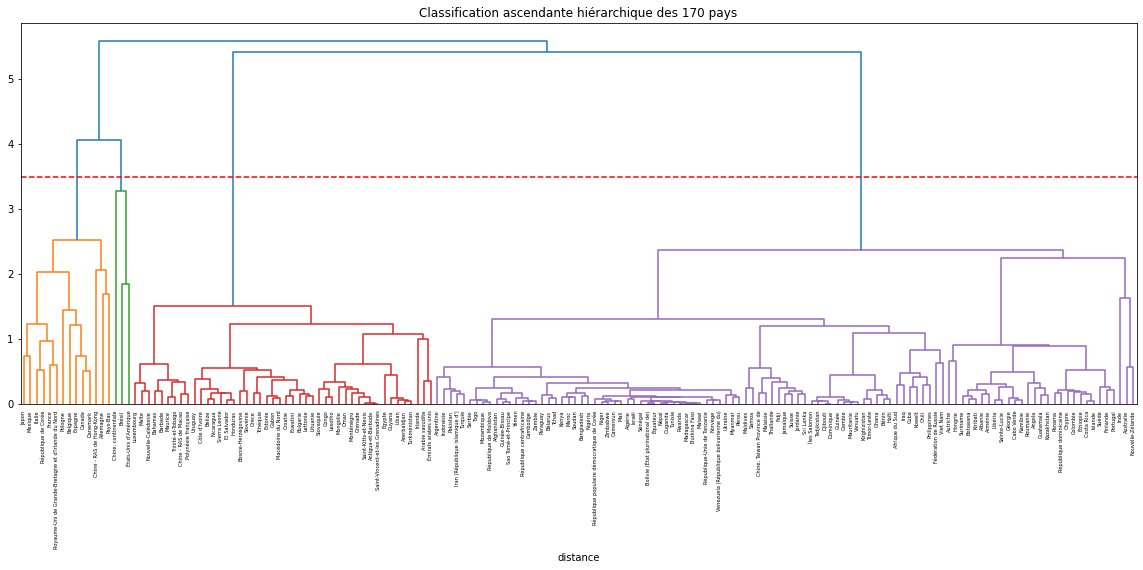

None

Classification ascendante hiérarchique des pays (5 premiers lignes)


Groupe                      Zone
0       1                     Japon
1       1                  Danemark
2       1  Chine - RAS de Hong-Kong
3       1                    Canada
4       1                   Espagne

Nombre de pays par groupe


Groupe
1     14
2      3
3     46
4    107
Name: Zone, dtype: int64

In [16]:
# Normaliser de données entre 0 et 1
X_final = Extract_dispo_popu.values
std_scale = preprocessing.MinMaxScaler().fit(X_final)
X_scaled = std_scale.transform(X_final)

# Homologuer les noms des colonnes normalisées
Y_final = pd.DataFrame(X_scaled)
Y_final.columns = Extract_dispo_popu.columns
Y_final.index = Extract_dispo_popu.index
names_final = Extract_dispo_popu.index

# Appliquer le méthode Ward
Z_final = linkage(Y_final, 'ward')

# Dendrogramme hiérarchique
display(plot_dendrogram(Z_final, names_final, 3.5 , "Classification ascendante hiérarchique des {} pays".format(len(Z_final)+1)))

# Découpage à la hauteur t = 3.5 ==> identifiants de 5 groupes obtenus
#groupes_cah = fcluster(Z_final,t=3.5, criterion='distance')
groupes_cah_f = fcluster(Z_final, 4, criterion='maxclust') # la division de 4 groupes
#print(groupes_cah)

# Index triés des groupes
idg_f = np.argsort(groupes_cah_f)
CAH_f = pd.DataFrame(Extract_dispo_popu.index[idg_f],groupes_cah_f[idg_f])

#Classement des pays par groupe CAH
CAH_f.reset_index(inplace = True)
CAH_f.rename(columns = {'index':'Groupe'}, inplace = True)
print(Fore.BLUE + Style.BRIGHT + f"Classification ascendante hiérarchique des pays (5 premiers lignes)"+ Style.RESET_ALL )
display(CAH_f.head())

print(Fore.BLUE + Style.BRIGHT + f"Nombre de pays par groupe"+ Style.RESET_ALL )
display(CAH_f.groupby(by='Groupe')['Zone'].count())

#display(CAH_f[CAH_f['Groupe']==2].head())

In [17]:
# Extraction de données CAH
Groupes_CAH = CAH_f.merge(Extract_dispo_popu, on ='Zone')
Groupes_CAH.to_csv('P9_Groupes_CAH_select_prod.csv',index=False, encoding='utf-8')

<p style="font-family:Time"> <b>Observation globale du dendrogramme :</b><br>
  <ul style="font-family:Time">
      Une séparation de 4 groupes de pays est suggérée grâce aux résultats de dendrogramme
      </ul>

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>2. Méthode "K-MEANS"<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>K-MEANS ou Partitionnement en k-moyennes</u><br></h4>

<ul style="font-family:Time">
      <li>Le but de ce méthode est de diviser les individus en k groupes. La division des groupes est basée sur la minimisation de la distance entre chaque individus du groupe et son centre de gravité (la moyenne des individus de ce groupe) ainsi que la maximisation de la distance entre des centres mobiles</li>
      <li>Le choix du nombre k de clusters à partitionner est réalisé grâce à la méthode du coude présenté en dessous. Le point du coude ou le nombre de cluster optimal à choisi est celui du nombre de clusters à partir duquel la variance ne se réduit plus significativement</li>

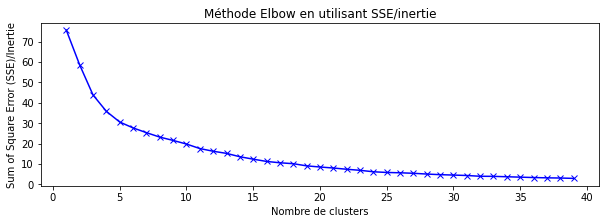

Nombre de groupes optimal choisi pour la méthode K-MEANS est 4


In [18]:
# Utilisation la méthode du coude pour trouver le nombre de clusters (groupes) optimal
inertias = [] 
mapping = {} 
K = range(1,40) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k, random_state=0 ).fit(X_scaled) 
#     kmeanModel.fit(X_final)     
    inertias.append(kmeanModel.inertia_) 

    mapping[k] = kmeanModel.inertia_ 
    
#Valeurs de SSE (Sum of Square Error)
#for key,val in mapping.items(): 
    #print(str(key)+' : '+str(val)) 
    
plt.figure(figsize = (10,3))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Nombre de clusters') 
plt.ylabel('Sum of Square Error (SSE)/Inertie') 
plt.title('Méthode Elbow en utilisant SSE/inertie') 
plt.show()
print(Fore.BLUE + Style.BRIGHT + f"Nombre de groupes optimal choisi pour la méthode K-MEANS est 4"+ Style.RESET_ALL )

In [19]:
n_clust = 4

# Clustering par K-means
km = KMeans(n_clusters= n_clust, random_state=0)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
print(Fore.BLUE + Style.BRIGHT + f"Liste de 5 premiers pays et de ses clusters K-MEANS" + Style.RESET_ALL)
k_moyenne = pd.DataFrame({"Cluster": clusters, "Zone": names_final})
k_moyenne["Cluster"] = k_moyenne["Cluster"] + 1 # Renommer les clusters
#print(k_moyenne.head())
k_moyenne_pivot = k_moyenne.pivot_table(index = "Zone", columns="Cluster", aggfunc=len, fill_value=0)
print(k_moyenne_pivot.head())

print(Fore.BLUE + Style.BRIGHT + f"Nombre de pays par cluster K-MEANS" + Style.RESET_ALL)
nb_pays = k_moyenne.groupby(by='Cluster').Zone.count().to_frame()
nb_pays.rename(columns = {'Zone': "Nombre de pays"}, inplace = True)
display(nb_pays)

Liste de 5 premiers pays et de ses clusters K-MEANS
Cluster         1  2  3  4
Zone                      
Afghanistan     0  1  0  0
Afrique du Sud  0  1  0  0
Albanie         1  0  0  0
Algérie         0  1  0  0
Allemagne       0  0  0  1
Nombre de pays par cluster K-MEANS


Nombre de pays
Cluster                
1                    62
2                    92
3                     3
4                    13

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>II. Projection des clusters<br></h2>

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>1. Projection des clusters par PCA (Principal Component Analysis)<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>PCA ou Analyse en Composantes Principales</u><br></h4>
<ul style="font-family:Time">
      <li>PCA est une méthode de réduction de dimension</li>
      <li>Son but est de maximiser l'inertie total du nuage projeté sur une sous-espace de plus petite dimension. Dans cette analyse, j'utlise une réduction d'une espace de 2 et 3 dimensions </li>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>3.1 <u>Projection les groupes (clusters) issus de la méthode CAH</u><br></h4>

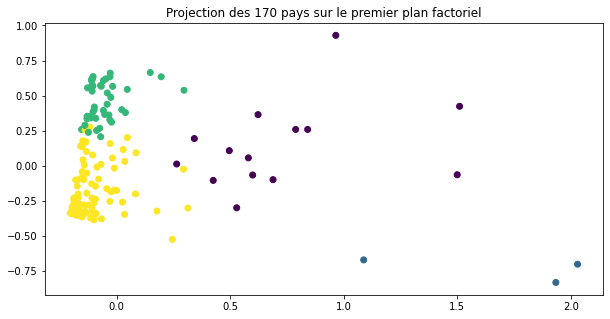

In [20]:
pca = decomposition.PCA(n_components=2).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.figure(figsize = (10,5))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=groupes_cah_f)
plt.title("Projection des {} pays sur le premier plan factoriel".format(X_projected.shape[0]))
plt.show()

<p style="font-family:Time"> <b>Observation :</b><br>
  <ul style="font-family:Time">
      Les clusters issus de la méthode CAH sont bien séparés en projectant sur le premier plan factoriel

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>3.2 <u>Projection les groupes (clusters) issus de la méthode K-MEANS</u><br></h4>

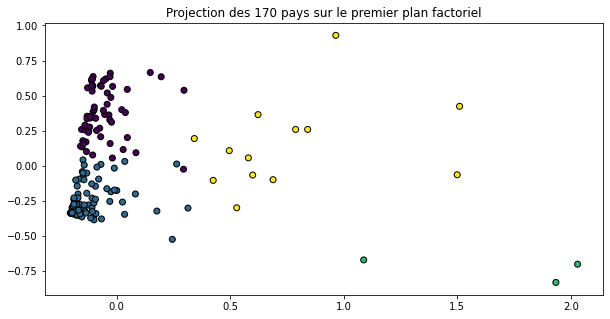

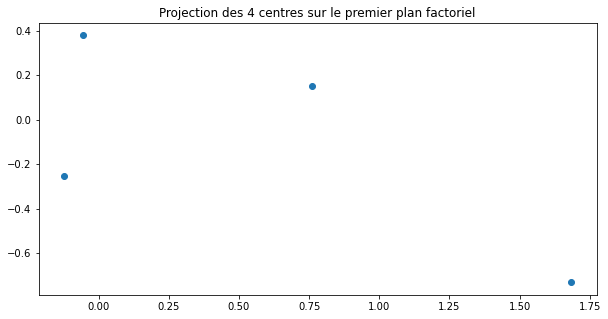

<Figure size 720x360 with 0 Axes>

In [21]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.figure(figsize = (10,5))
pca = decomposition.PCA(n_components=2).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), edgecolor="k")
plt.title("Projection des {} pays sur le premier plan factoriel".format(X_projected.shape[0]))
plt.show()

# Affichage du clustering par projection des centroides plan factoriel
plt.figure(figsize = (10,5))
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le premier plan factoriel".format(len(centroids)))
plt.show()

# Présentaion en 3D pour un ACP de 3 dimensions
fig = plt.figure(figsize = (10,5))
pca_3D = decomposition.PCA(n_components=3).fit(X_scaled)

# Préparation df pour la présentation 3D
X_3D = pca_3D.transform(X_scaled)
X_proj_3D = pd.DataFrame(X_3D).rename(columns= {0:'Col1',1:'Col2', 2:'Col3'})
X_proj_3D['Cluster'] = clusters.astype(np.float)
X_proj_3D['Zone'] = k_moyenne['Zone']

fig = px.scatter_3d(X_proj_3D, x='Col1', y='Col2', z='Col3', hover_data = ['Zone'],
                    color='Cluster', title="Projection des pays issus de K-Means et PCA sur 3 axes")
fig.show()


In [22]:
# Extraction de donnée en fichier cvs
k_moyenne.to_csv('P9_kMEANS_select_prod.csv',index=False, encoding='utf-8')

<p style="font-family:Time"> <b>Observation :</b><br>
  <ul style="font-family:Time">
      <li>Les clusters issus de la méthode K-MEANS sont séparés en projectant sur le premier plan factoriel</li>
      <li>La projection des centroïdes montrent la présentation les distances d'inter-classe. Dans ce cas, ils sont bien séparés les uns des autres, qui indiquent également une efficacité de la méthode K-MEANS</li>

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>2. Projection des clusters par TSNE (t-distributed stochastic neighbor embedding)<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>TSNE ou t-distributed stochastic neighbor embedding</u><br></h4>
<ul style="font-family:Time">
      <li>TSNE est une méthode de réduction de dimension</li>
      <li>Son but est de rapprocher des membres de données à analyser en utilisant la distribution t de Student et puis les projecter sur une nuage de point. Dans cette analyse, j'utilise une réduction d'une espace de 2 dimensions</li>

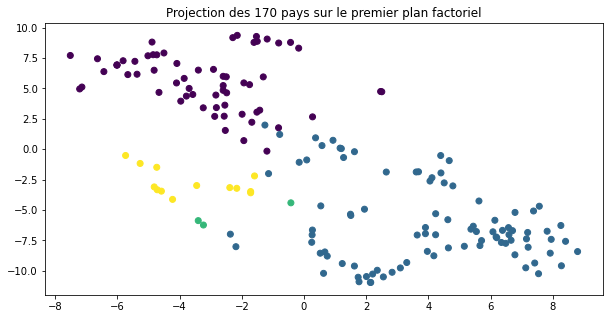

Les pays groupés par la méthode K-MEANS sont plus étalés en utilisant la projection de TSNE en 2D par rapport à celle de PCA


In [23]:
# Réduction du résultat de K-MEANS en 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_scaled)

# Projection en 2D
plt.figure(figsize=(10, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters.astype(np.float))
plt.title("Projection des {} pays sur le premier plan factoriel".format(len(X_scaled)))
plt.show()
print(Fore.BLUE + Style.BRIGHT + f"Les pays groupés par la méthode K-MEANS sont plus étalés en utilisant la projection de TSNE en 2D \
par rapport à celle de PCA" + Style.RESET_ALL)

<h3 style="color:blue; text-align:center; font-size:120%; font-family:Georgia; border:2px solid DodgerBlue"><br>3. Projection des clusters sur la carte mondiale<br></h3>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Comparaison des clusters issus de 2 méthodes de groupements</u><br></h4>

In [24]:
comparaison_clusters = pd.crosstab(groupes_cah_f,(km.labels_+1), rownames=["CAH"], colnames=["K-MEANS"])
display(comparaison_clusters)
print(Fore.BLUE + Style.BRIGHT + f"Le nombre de pays de chaque cluster est similaire malgré qu'il y a la différence du nom des clusters de 2 types de regroupement" + Style.RESET_ALL)

K-MEANS   1   2  3   4
CAH                   
1         0   1  0  13
2         0   0  3   0
3        46   0  0   0
4        16  91  0   0

Le nombre de pays de chaque cluster est similaire malgré qu'il y a la différence du nom des clusters de 2 types de regroupement


<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Carte géographique des clusters issus de 2 méthodes de groupements</u><br></h4>

<img src="P9_Cluster_CAH.PNG" height="500" width="1000" >
<img src="P9_Cluster_K_means.PNG" height="500" width="1500" >

<p style="font-family:Time"> <b>Observation :</b><br>
  <ul style="font-family:Time">
      <li>La classification des pays par les méthodes K-MEANS et CAH est cohérente, sauf quelque pays du cluster bleu clair</li>
      <li>En générale, les clusters se séparent par 3 groupes : pays en développement (cluster vert), pays développés (cluster bleu clair) et grands exportateurs (cluster rose)</li>
      <li>L'observation détaillée des caractéristiques de chaque cluster sera interprétée dans la partie suivante, par l'observation de la heatmap avec les croisements entre les clusters de pays issue de la méthode K-MEANS et les différentes variables</li>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>III. Heatmap<br></h2>

<h4 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br><u>Heatmap avec les croisements entre les clusters de pays issus de la méthode K-MEANS et les différentes variables</u><br></h4>


<ul style="font-family:Time">
      <li>Ce heatmap utilise des données de K-MEANS qui sont normalisées entre 0 et 1 (contrairement à celles affichées dans les cases, qui sont des données brutes non-normalisées)</li>
      <li>Les matrices de corrélation entre les clusters et les variables sont présentées par un gradient de couleur (le vert dans ce cas). Plus la couleur est foncée, plus ils sont corrélés</li>

In [25]:
# Population moyenne par cluster k_means

Popu_k_means = Extract_Population_2017.merge(k_moyenne, on="Zone").groupby(by="Cluster")["Population"].mean().to_frame()
Popu_k_means

# Calcul de TDI par cluster k-means

Data_k_means = Viandes_TDI.merge(k_moyenne, on="Zone") #jointure des clusters k-means aux données d'importation

Import = Data_k_means.groupby(by=["Cluster","Produit"])["Importation"].sum().to_frame() #quantité d'importation par cluster

Data_k_means['Production_restante'] = (Data_k_means['Production'] + Data_k_means['Importation'] - Data_k_means['Exportation']) #calcul de la quantité de la production restante

Restant = Data_k_means.groupby(by=["Cluster","Produit"])["Production_restante"].sum().to_frame()

TDI_k_means = Import.merge(Restant, on = ["Cluster","Produit"]) # jointure des données pour calculer TDI

TDI_k_means["TDI"] = TDI_k_means["Importation"]*100/TDI_k_means["Production_restante"]

TDI_k_means.drop(columns = ["Importation", "Production_restante"], inplace = True)

# Calcul de la moyenne des quantités d'importation, d'exportation et de production par cluster

Moyenne_Cluster = Data_k_means.groupby(by=["Produit","Cluster"]).mean()

Moyenne_Cluster.drop(columns = ["TDI (%)", "Production_restante"], inplace = True)

# Jointure des valeurs moyennes issus des 2 calculs en dessus

Moyenne_Cluster2 = Moyenne_Cluster.merge(TDI_k_means, on = ["Cluster", "Produit"])

Data_k_means_heatmap = Moyenne_Cluster2.pivot_table(Moyenne_Cluster2, index=["Cluster"], columns=["Produit"], aggfunc=np.sum).merge(Popu_k_means, on="Cluster")

Data_k_means_heatmap.rename(columns = {"Population" : "Population_moyenne" })

(Exportation, Abats Comestible)  \
Cluster                                    
1                              11.580645   
2                               6.065217   
3                             319.000000   
4                             284.076923   

         (Exportation, Viande d'Ovins/Caprins)  \
Cluster                                          
1                                    15.435484   
2                                     0.586957   
3                                     3.000000   
4                                    15.538462   

         (Exportation, Viande de Bovins)  (Exportation, Viande de Suides)  \
Cluster                                                                     
1                              56.645161                        19.112903   
2                              30.032609                         6.549451   
3                            1102.000000                      1243.666667   
4                             264.846154                       882.538462   

         (Exportation, Viande de Volailles)  (Exportation, Viande, Autre)  \
Cluster                                                                     
1                                 15.580645                      3.016129   
2                                 26.130435                      0.934783   
3                               2830.333333                     56.333333   
4                                460.307692                     27.076923   

         (Importation, Abats Comestible)  \
Cluster                                    
1                              11.790323   
2                              11.206522   
3                             450.000000   
4                             164.153846   

         (Importation, Viande d'Ovins/Caprins)  \
Cluster                                          
1                                     2.338710   
2                                     2.163043   
3                                   126.000000   
4                                    28.846154   

         (Importation, Viande de Bovins)  (Importation, Viande de Suides)  \
Cluster                                                                     
1                              19.645161                        51.516129   
2                              38.304348                        24.604396   
3                             816.333333                       684.000000   
4                             315.461538                       667.076923   

         ...  (Production, Viande de Suides)  \
Cluster  ...                                   
1        ...                       52.209677   
2        ...                      231.329670   
3        ...                    23318.000000   
4        ...                     1951.846154   

         (Production, Viande de Volailles)  (Production, Viande, Autre)  \
Cluster                                                                   
1                               108.322581                    13.419355   
2                               455.054348                    25.706522   
3                             18117.000000                   753.000000   
4                              1453.846154                    37.384615   

         (TDI, Abats Comestible)  (TDI, Viande d'Ovins/Caprins)  \
Cluster                                                           
1                      42.426001                       9.397278   
2                      13.619551                       2.949896   
3                      17.334361                       7.213740   
4                     102.056432                      41.073384   

         (TDI, Viande de Bovins)  (TDI, Viande de Suides)  \
Cluster                                                     
1                      28.207503                60.884483   
2                      14.112370                 9.866044   
3                       8.790065                 3.005492   
4                      40.080141        

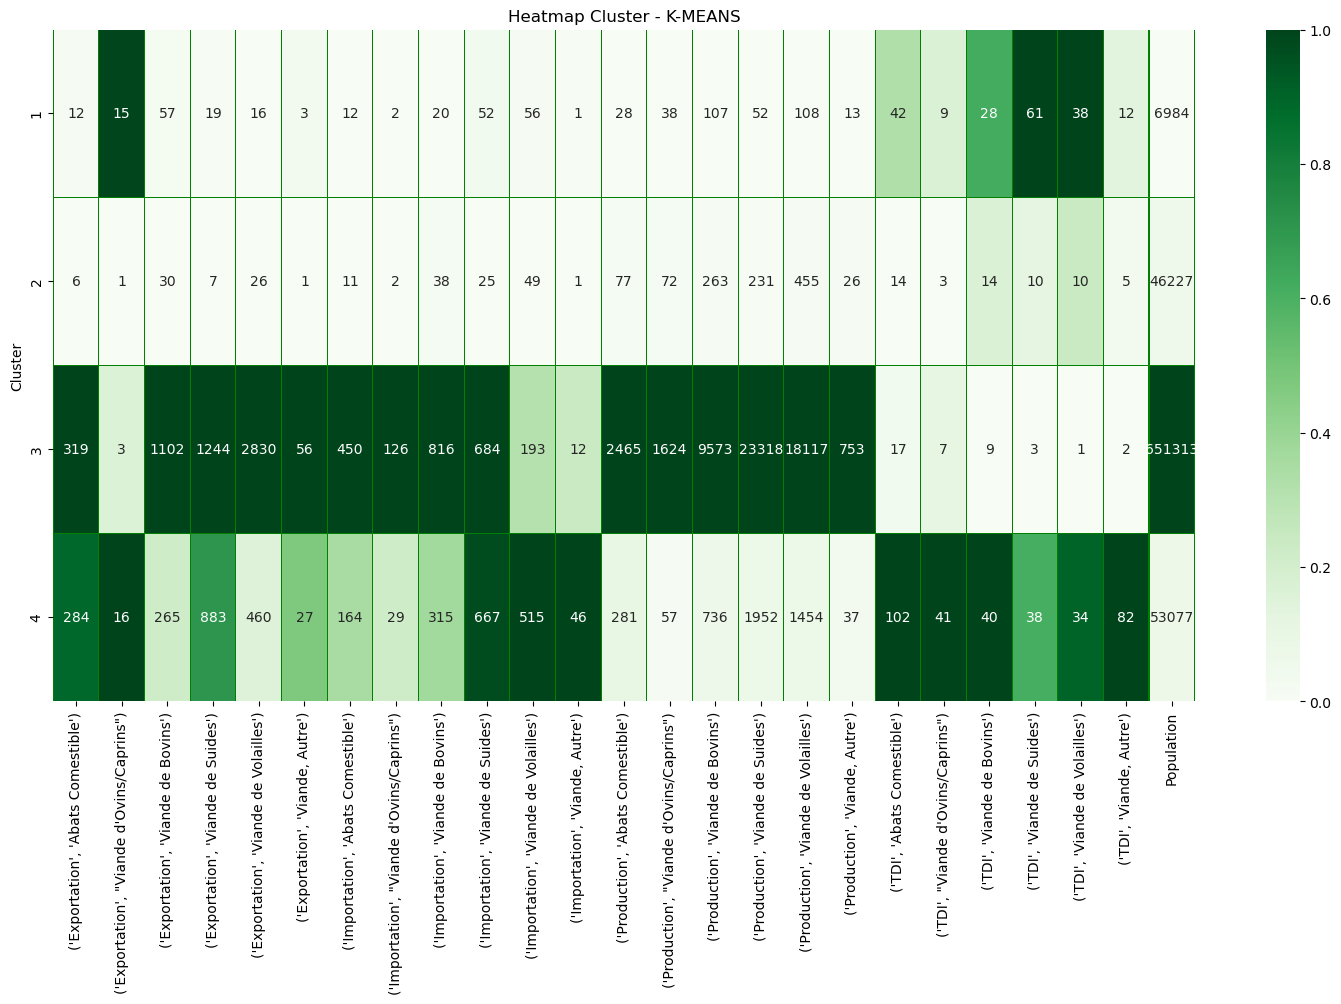

In [26]:
# Normaliser les nouvelles données de heatmap

Normalized_heatmap = preprocessing.MinMaxScaler().fit(Data_k_means_heatmap).transform(Data_k_means_heatmap)

# Homologuer les noms des colonnes normalisées

Normalized_heatmap_1 = pd.DataFrame(Normalized_heatmap)
Normalized_heatmap_1.columns = Data_k_means_heatmap.columns
Normalized_heatmap_1.index = Data_k_means_heatmap.index
names_cluster = Data_k_means_heatmap.index

# Heatmap

fig = plt.figure(num=None, figsize=(15,10), dpi=100, facecolor='w', edgecolor='k')
labels = np.array(Data_k_means_heatmap.values)
res = sns.heatmap(Normalized_heatmap_1.iloc[:,:], annot=labels, 
                  fmt='.0f', cmap='Greens', cbar_kws={"shrink": 1},
                  linewidths=0.01, linecolor='green')
plt.tight_layout()
plt.title('Heatmap Cluster - K-MEANS')
plt.savefig('P9_Heatmap Cluster - K-MEANS.png')              
plt.show()

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:Georgia; border:2px solid LightSteelBlue"><br>PARTIE 3<br><br>Conclusion<br></h1>

<h5 style="color:royalblue; text-align:left; font-size:100%; font-family:Georgia"><br><u>Vue générale des carctéristiques de cluster</u><br></h5>
<ul style="font-family:Time">
      <li><b>Cluster 1 :</b> forte en exportation de la viande d'ovines/caprins. Taux de dépendance des importations TDI des viandes de volailles, de bovins et de suides sont importants en comparant avec les autres clusters</li>
      <li><b>Cluster 2 :</b> caractérisé par la plupart des pays africains moins développés et des pays asiatiques en développement (sauf la Russie), ce qui explique un faible mouvement de l'exportation, de l'importation et de la production de la viande sur l'ensemble des pays du cluster par rapport aux autres. La Russie se trouve dans ce cluster à cause des interdictions (sanctions) économiques en terme d'échangement de produits alimentaires en provenance des Etats-unis, de l'Autralie, de la Norvège, du Canada et de l'Unions européens</li>
      <li><b>Cluster 3 :</b> regroupe les pays plus peuplés du monde et plus grands exportateurs de la viande et des abats comestibles : les Etat-unis, le Brésil et la Chine, donc l'exportation de la viande de volailles est toujours dominée. La population favorise aussi l'importation de la viande chez cluster 3. Cependant, le taux de dépendance des importations TDI est très faible car ils sont autonomes dans la réponse de la demande intérieure</li>
      <li><b>Cluster 4 :</b> contenant des pays européens et pays développé (Canada, Japon...). Ce cluster est caractérisé par une forte importation et demande intérieure de la viande, ce qui induit des TDI significatifs, à l'exception du TDI de l'abats comestibles. Ce taux qui est suppérieur à 100% explique une exportation non négligeable de ce produit en comparant avec sa quantité d'importation</li>

<h5 style="color:royalblue; text-align:left; font-size:100%; font-family:Georgia"><br><u>Vue détaillée de la filière avicole mondiale</u><br></h5>
<ul style="font-family:Time">
    <li>La consommation mondiale la viande de volaille occupe toujours une croissance significative par rapport aux autres viandes grâce à un prix doux et une productivité efficace</li>
    <li>La production et l'exportation de ce type de viande est très dynamique et importante chez les pays de cluster 3 et 4, plus précisément chez les 3 grands exportateurs du monde et l'Union européen, ce qui provoque un marché non potentiel pour l'exportation de nos poulets</li>
    <li>Dans certaine pays en développement de cluster 2, la croissance de la production favorise une hausse de la productivité dans cette filière. De plus, l'augmentation du revenus et l'économie influence également la consommation de la viande, plus particulier des pays en développement asiatiques (par exemple le Vietnam, la Malaisie) et certains pays africains mais <i>"la consommation reste limitée lorsqu'elle est exprimée par habitant"</i> chez les derniers (selon FAO)</li>
    <li>Le TDI de la viande volaille est aussi remarquable chez les pays de cluster 1, avec une forte demande intérieure de ce type de viande par rapport aux autres clusters</li>
    <li>D'autre part, la consommation est influencée aussi par la population. En observant la population moyenne de chaque cluster, on peut déduire que plus la population est nombreuse, plus le marché est dynamique (cluster 3, 4) et potentiel (cluster 1, 2)</li>
    <li>En résumé, les clusters 1 et 2 sont des clusters ayant les fortes opportunitées pour l'exportation de la viande de volailles</li>